In [ ]:
import fastbook
fastbook.setup_book()

## Cat vs Dog CNN Classifier

In [ ]:
from fastai.vision.all import *

# get the path for the dataset 
path = untar_data(URLs.PETS)/'images'

dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.25, seed=8,
    label_func = lambda name: name[0].isupper(), item_tfms=Resize(224)
)

learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.154939,0.190880,0.933406,01:25


epoch,train_loss,valid_loss,accuracy,time
0,0.047549,0.330281,0.913914,01:54
1,0.027428,0.153813,0.948565,01:54


In [ ]:
from fastai.vision.all import *
uploader = SimpleNamespace(data=['../images/dog_test.jpg', '../images/dog_test_2.jpg', '../images/chapter1_cat_example.jpg'])
uploader.data

['../images/dog_test.jpg',
 '../images/dog_test_2.jpg',
 '../images/chapter1_cat_example.jpg']

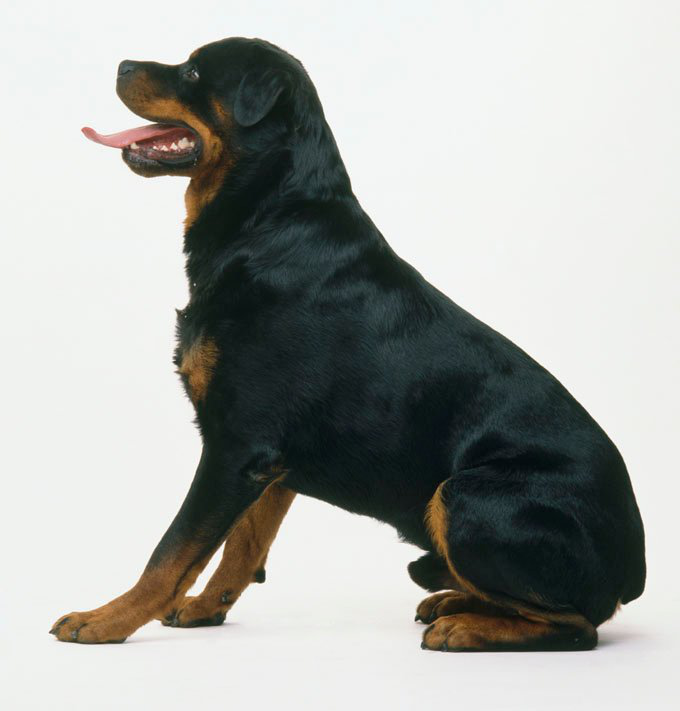

In [ ]:
img_dog_1 = PILImage.create(uploader.data[0])
img_dog_1 

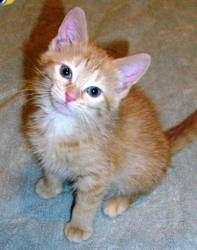

In [ ]:
img_cat = PILImage.create(uploader.data[2])
img_cat

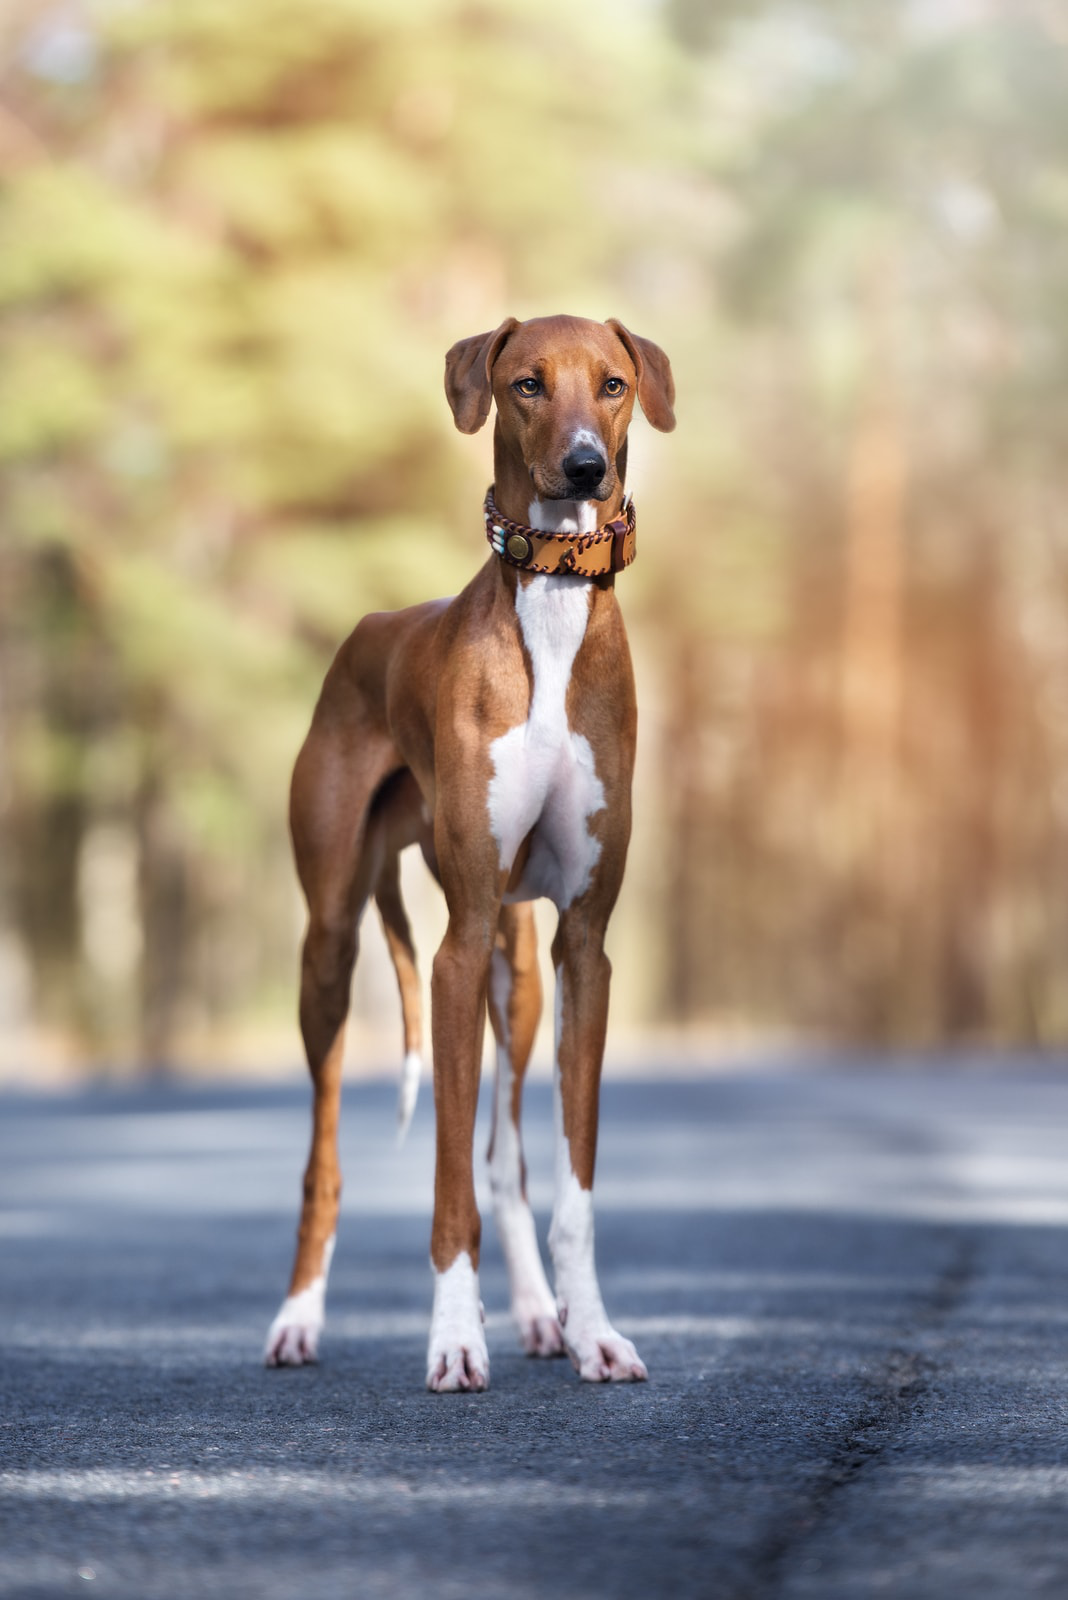

In [ ]:
img_dog_2 = PILImage.create(uploader.data[1])
img_dog_2

In [ ]:
is_cat, _, probability = learn.predict(img_dog_1)
print(is_cat, probability[1])

True tensor(0.9739)


In [ ]:
is_cat_2, _, prob_2 = learn.predict(img_dog_2)
print(is_cat_2, prob_2[0])

False tensor(0.9997)


In [ ]:
is_cat_3, _, prob_3 = learn.predict(img_cat)
print(is_cat_3, prob_3[0])

True tensor(3.6241e-08)


## Code for image segmentation

In [ ]:
seg_path = untar_data(URLs.CAMVID_TINY)

dls = SegmentationDataLoaders.from_label_func(
    seg_path, bs=16, fnames=get_image_files(seg_path/'images'),
    label_func = lambda n: seg_path/'labels'/f'{n.stem}_P{n.suffix}',
    codes = np.loadtxt(seg_path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(3)

epoch,train_loss,valid_loss,time
0,3.950122,5.839385,00:03


epoch,train_loss,valid_loss,time
0,3.194765,2.375723,00:03
1,2.660280,2.279378,00:03
2,2.317145,2.066963,00:03


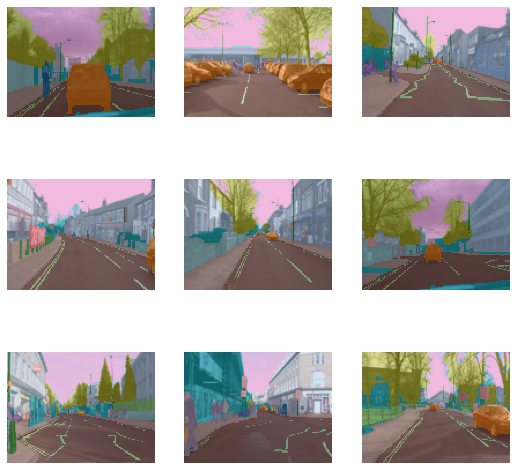

In [ ]:
dls.show_batch()

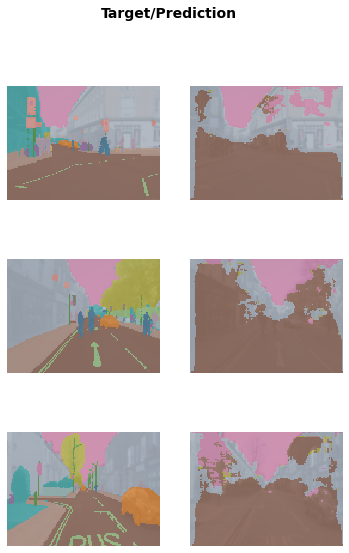

In [ ]:
learn.show_results(max_n=3)

In [ ]:
from fastai.tabular.all import *

adult_path = untar_data(URLs.ADULT_SAMPLE)
adult_path

Path('/storage/data/adult_sample')

In [ ]:
dls = TabularDataLoaders.from_csv(
    adult_path/'adult.csv', path=adult_path, y_names='salary',
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs=[Categorify, FillMissing, Normalize]
)

dls.show_batch()

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,salary
0,Private,Masters,Never-married,Sales,Own-child,White,False,27.000000,60288.001144,14.0,<50k
1,?,HS-grad,Married-spouse-absent,?,Not-in-family,White,False,42.000000,234276.998949,9.0,<50k
2,Private,Some-college,Never-married,Prof-specialty,Own-child,Asian-Pac-Islander,False,20.999999,109413.998426,10.0,<50k
3,Private,11th,Never-married,Transport-moving,Not-in-family,Black,False,33.000000,124186.997395,7.0,<50k
4,?,HS-grad,Separated,?,Unmarried,Black,False,47.000000,109921.003111,9.0,<50k
5,Private,HS-grad,Married-civ-spouse,Sales,Own-child,Black,False,20.000000,470874.988670,9.0,<50k
6,Private,Some-college,Divorced,Sales,Unmarried,Asian-Pac-Islander,False,39.000000,82488.005077,10.0,<50k
7,Private,HS-grad,Never-married,Other-service,Own-child,Asian-Pac-Islander,False,37.000000,70240.000852,9.0,<50k
8,Private,Bachelors,Married-civ-spouse,Sales,Husband,Black,False,48.000000,182566.000151,13.0,>=50k
9,Private,10th,Never-married,Other-service,Own-child,White,False,17.000001,202344.000625,6.0,<50k


In [ ]:
tab_learn = tabular_learner(dls, metrics=accuracy)

In [ ]:
tab_learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.378411,0.345433,0.835381,00:06
1,0.361491,0.341932,0.850123,00:06
2,0.355701,0.336494,0.849662,00:06
3,0.353795,0.333757,0.850430,00:06


In [ ]:
tab_learn.show_results()

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,salary,salary_pred
0,8.0,12.0,3.0,6.0,1.0,5.0,1.0,1.866056,-0.794486,-0.424242,0.0,0.0
1,5.0,16.0,3.0,8.0,1.0,5.0,1.0,0.029249,-0.334717,-0.030713,0.0,0.0
2,5.0,10.0,5.0,14.0,2.0,5.0,1.0,-0.999363,0.004800,1.149875,0.0,0.0
3,5.0,12.0,5.0,9.0,4.0,5.0,1.0,-1.293252,0.578101,-0.424242,0.0,0.0
4,5.0,5.0,1.0,4.0,2.0,5.0,1.0,0.543555,0.246611,-2.785417,0.0,0.0
5,5.0,16.0,5.0,13.0,4.0,5.0,1.0,-1.293252,0.902517,-0.030713,0.0,0.0
6,5.0,12.0,5.0,2.0,4.0,5.0,1.0,-1.146308,0.323487,-0.424242,0.0,0.0
7,5.0,1.0,5.0,13.0,4.0,5.0,1.0,-1.587141,0.061189,-1.604830,0.0,0.0
8,5.0,12.0,5.0,9.0,2.0,3.0,1.0,-0.778946,-0.064278,-0.424242,0.0,0.0
